## Data Characterisation

### Module Importing

In [1]:
import pandas
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from langdetect import detect
from googletrans import Translator

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lukas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lukas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Get Dataset and Create Dataframes for Testing and Training

In [58]:
# get the dataset
trainingData = pandas.read_csv("dataset/mediaeval-2015-trainingset.txt", sep="\t")
testingData = pandas.read_csv("dataset/mediaeval-2015-testset.txt", sep="\t")

# create pandas dataframes for training and testing
training_df = pandas.DataFrame(data = trainingData)
testing_df = pandas.DataFrame(data = testingData)

### Get general information on dataset

In [3]:
# size of training dataset
training_df.shape

(14277, 7)

In [9]:
# size of testing dataset
testing_df.shape

(3755, 7)

### Find any duplicates in dataset

In [4]:
# brief description of training dataset
training_df.describe(include=object)

,tweetText,imageId(s),username,timestamp,label
count,14277,14277,14277,14277,14277
unique,12376,377,13498,13909,3
top,Unbelievable scene flying over #StatenIsland i...,sandyA_fake_29,SAGandAFTRA,Tue Oct 30 00:31:14 +0000 2012,fake
freq,42,1100,16,4,6742


In [39]:
# brief description of testing dataset
testing_df.describe(include=object)

,tweetText,Images,username,timestamp,label,cleanedText
count,3755,3755,3755,3755,3755,3755
unique,3706,88,3553,3449,2,1712
top,"J'aime une vidéo @YouTube : ""SYRIA! SYRIAN HER...",syrianboy_1,_WTFVideos,Sat Apr 25 18:05:05 +0000 2015,fake,Nepals historic Dharahara Tower collapse massi...
freq,4,1769,23,13,2546,312


In [5]:
# general information about training dataset
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14277 non-null  int64 
 1   tweetText   14277 non-null  object
 2   userId      14277 non-null  int64 
 3   imageId(s)  14277 non-null  object
 4   username    14277 non-null  object
 5   timestamp   14277 non-null  object
 6   label       14277 non-null  object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


In [40]:
# general information about testing dataset
testingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     3755 non-null   int64 
 1   tweetText   3755 non-null   object
 2   userId      3755 non-null   int64 
 3   imageId(s)  3755 non-null   object
 4   username    3755 non-null   object
 5   timestamp   3755 non-null   object
 6   label       3755 non-null   object
dtypes: int64(2), object(5)
memory usage: 205.5+ KB


### Find and produce bar chart on the number of different types of labels used in training set

label
fake     6742
real     4920
humor    2614
Name: tweetId, dtype: int64


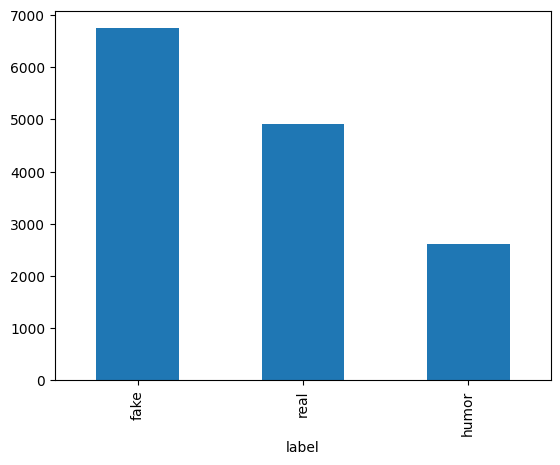

In [6]:
# find number of tweets with each label
labelCount = training_df.groupby(training_df.label.str.split('_').str[0])['tweetId'].nunique()
labelCount = labelCount.sort_values(ascending=False)
print (labelCount)

# plot event frequency on bar chart
labelCount.plot(kind='bar')
plt.show()

### Find and produce bar chart on the number of different types of labels used in testing set

label
fake    2546
real    1209
Name: tweetId, dtype: int64


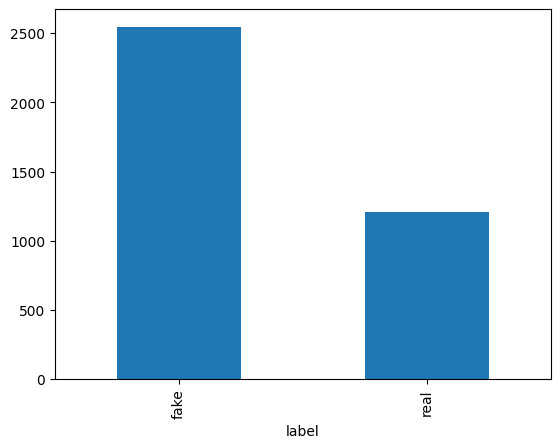

In [10]:
# find number of tweets with each label
labelCount = testing_df.groupby(testing_df.label.str.split('_').str[0])['tweetId'].nunique()
labelCount = labelCount.sort_values(ascending=False)
print (labelCount)

# plot event frequency on bar chart
labelCount.plot(kind='bar')
plt.show()

### Find and produce bar chart on the different events represented in training dataset

Images
sandyA                9695
sandyB                2621
boston                 546
malaysia               501
sochi                  402
columbianChemicals     185
bringback              131
underwater             112
passport                46
pigFish                 14
elephant                13
livr                     9
Name: tweetId, dtype: int64


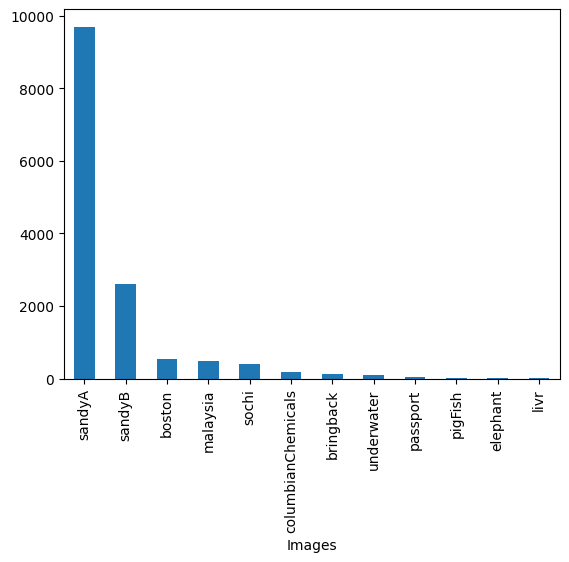

In [11]:
# find number of tweets about event for training
training_df.rename(columns = {'imageId(s)':'Images'}, inplace = True)
imgCount = training_df.groupby(training_df.Images.str.split('_').str[0])['tweetId'].nunique()
imgCount = imgCount.sort_values(ascending=False)
print (imgCount)

# plot event frequency on bar chart
imgCount.plot(kind='bar')
plt.show()

### Find and produce bar chart on the different events represented in testing dataset

Images
syrianboy     1769
nepal         1353
eclipse        277
samurai        218
garissa         77
varoufakis      61
Name: tweetId, dtype: int64


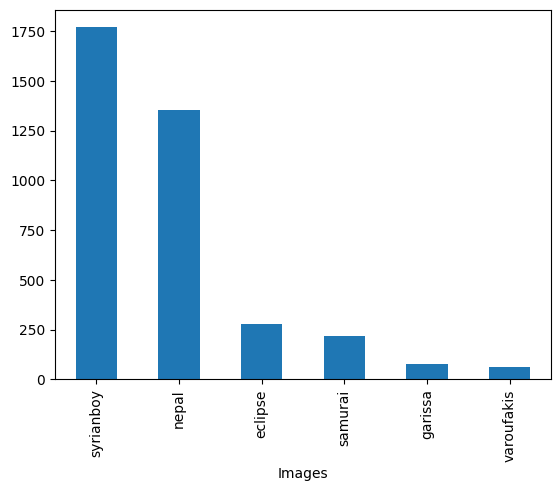

In [12]:
# find number of tweets about event for testing
testing_df.rename(columns = {'imageId(s)':'Images'}, inplace = True)
imgCount = testing_df.groupby(testing_df.Images.str.split('_').str[0])['tweetId'].nunique()
imgCount = imgCount.sort_values(ascending=False)
print (imgCount)

# plot event frequency on bar chart
imgCount.plot(kind='bar')
plt.show()

### Get information on the number of different languages used in the tweetTexts in the dataset

Number of different languages:  {'es': 998, 'en': 8601, 'sq': 7, 'pt': 144, 'bg': 7, 'it': 74, 'no': 23, 'fr': 140, 'tl': 155, 'nl': 66, 'de': 80, 'cy': 87, 'id': 136, 'ru': 40, 'sl': 8, 'ja': 15, 'ar': 55, 'af': 54, 'vi': 11, 'ca': 27, 'hu': 6, 'sv': 39, 'so': 77, 'fi': 11, 'pl': 29, 'hr': 3, 'da': 19, 'el': 4, 'lt': 4, 'sk': 12, 'he': 1, 'tr': 27, 'zh-cn': 6, 'ro': 6, 'fa': 2, 'et': 8, 'sw': 6, 'ko': 3, 'th': 13, 'cs': 1, 'N/A': 1, 'mk': 1, 'hi': 1, 'lv': 1}


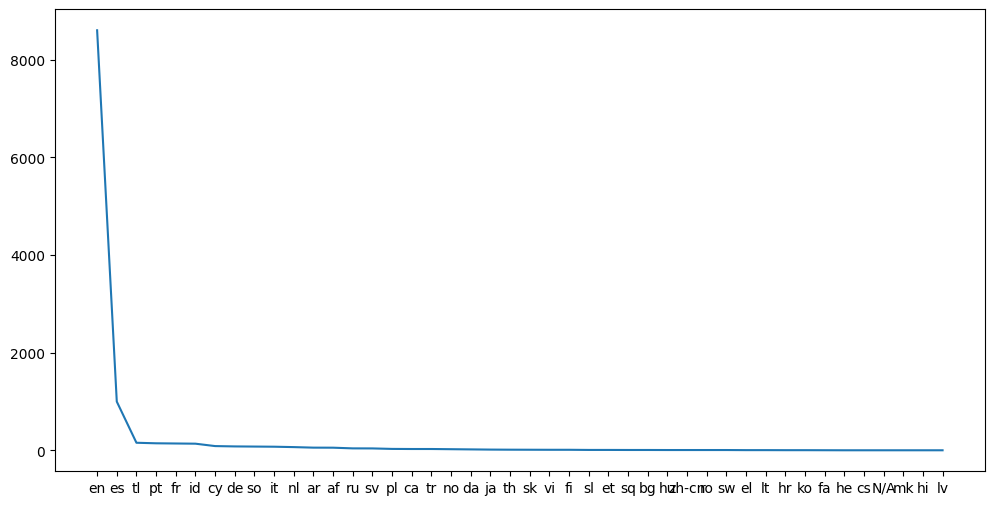

In [51]:
# find all different languages of the tweetTexts in the training dataset
langs = dict()

for tweetText in training_df['tweetText']:
    try:
        language = detect(tweetText)
    except:
        language = "N/A"

    if language in langs.keys():
        langs[language] = langs[language] + 1
    else:
        langs[language] = 1


print ("Number of different languages: ", langs)

# plot language frequencies on a line chart
lists = sorted(langs.items(), key=lambda x:x[1], reverse=True)

x, y = zip(*lists)

plt.figure(figsize=(12,6))
plt.plot(x, y)
plt.show()

Number of different languages:  {'en': 2783, 'fr': 33, 'es': 66, 'ca': 6, 'it': 18, 'pt': 35, 'nl': 23, 'fi': 4, 'id': 7, 'af': 5, 'sq': 7, 'ar': 188, 'hr': 1, 'tr': 12, 'hi': 5, 'ta': 1, 'et': 2, 'el': 2, 'so': 491, 'tl': 3, 'pl': 2, 'te': 2, 'ru': 2, 'th': 2, 'sv': 3, 'vi': 2, 'ko': 1, 'ja': 2, 'cy': 5, 'lt': 1, 'de': 41}


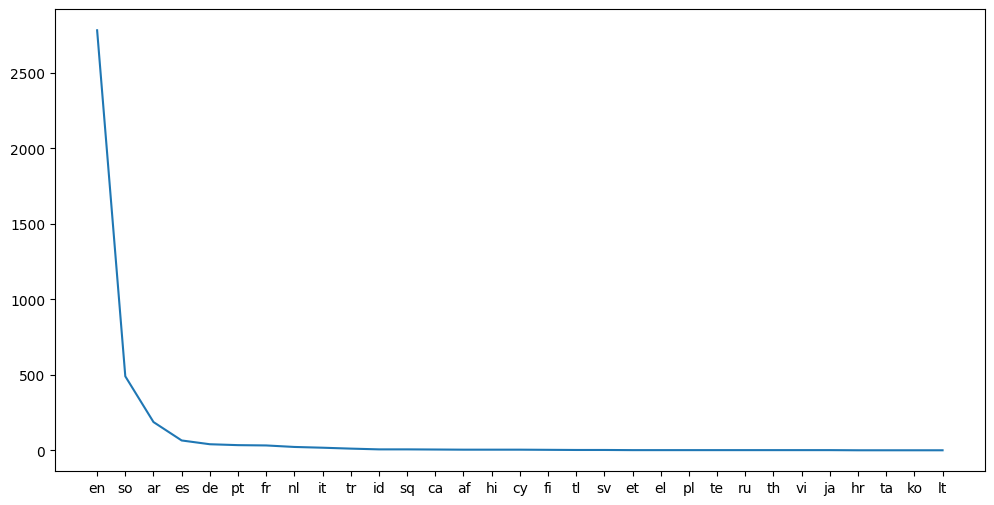

In [50]:
# find all different languages of the tweetTexts in the testing dataset
langs = dict()

for tweetText in testing_df['tweetText']:
    try:
        language = detect(tweetText)
    except:
        language = "N/A"

    if language in langs.keys():
        langs[language] = langs[language] + 1
    else:
        langs[language] = 1


print ("Number of different languages: ", langs)

# plot language frequencies on a line chart
lists = sorted(langs.items(), key=lambda x:x[1], reverse=True)

x, y = zip(*lists)

plt.figure(figsize=(12,6))
plt.plot(x, y)
plt.show()

## Data Preprocessing

### Change all data labels of 'humour' to 'fake'

In [59]:
#Changing 'humor' to 'fake'
training_df.loc[(training_df.label == 'humor'), 'label'] = 'fake'
testing_df.loc[(testing_df.label == 'humor'), 'label'] = 'fake'

### This function is used to translate any non-English tweets to English using googletrans' library

In [52]:
# function to translate tweetText
def translate_tweet(tweetText):
    translator = Translator()
    translated_tweet = translator.translate(tweetText, dest='en').text
    return translated_tweet

### Cleanse tweets of any unnecessary information (or noise)

In [61]:
# remove all unnecessary non-textual features and noise from tweetText
def remove_noise(tweetText):
    # removes URLs
    tweetText = re.sub(r'http\S+','', tweetText)
    tweetText = re.sub(r'\\\/\S+', '', tweetText)
    # removes usernames
    tweetText = re.sub(r'@\w+', '', tweetText)
    # removes '&'s and newline symbol
    tweetText = re.sub(r'&amp;', '', tweetText)
    tweetText = re.sub(r'\\n', '', tweetText)
    # removes non-word characters
    tweetText = re.sub(r'[^\w\s]','',tweetText)
    # removes numbers
    tweetText = re.sub(r'[0-9]','',tweetText)

    emoticons = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags = re.UNICODE)
    # removes emoticons
    tweetText = emoticons.sub(r'', tweetText)

    # translate non-English tweets (NOT WORKING)
    #if detect(tweetText) != 'en':
    #    tweetText = translate_tweet(tweetText)
    
    return tweetText

# remove text noise using function above
training_df['cleanedText'] = training_df['tweetText'].apply(lambda text: remove_noise(text))
testing_df['cleanedText'] = testing_df['tweetText'].apply(lambda text: remove_noise(text))
training_df.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,cleanedText
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,Se acuerdan de la película El día después de m...
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,Miren a Sandy en NY Tremenda imagen del hura...
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,Buena la foto del Huracán Sandy me recuerda a ...
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,Scary shit hurricane NY
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,My fave place in the world nyc hurricane sandy...


### Remove stopwords from tweetText

In [72]:
# initiate stopwords
stopwords = nltk.corpus.stopwords.words()

In [73]:
# removes stopwords
training_df['cleanedText'] = training_df['cleanedText'].apply(lambda text: ' '.join([x for x in text.split() if x not in stopwords]))
testing_df['cleanedText'] = testing_df['cleanedText'].apply(lambda text: ' '.join([x for x in text.split() if x not in stopwords]))

### Tokenize and Lemmatise tweets

In [74]:
# initiate lemmatiser
tokeniser = nltk.tokenize.WhitespaceTokenizer()
lemmatiser = nltk.stem.WordNetLemmatizer()

# lemmatise tweetText
training_df['cleanedText'] = training_df['cleanedText'].apply(lambda text: ' '.join([lemmatiser.lemmatize(x) for x in tokeniser.tokenize(text)]))
testing_df['cleanedText'] = testing_df['cleanedText'].apply(lambda text: ' '.join([lemmatiser.lemmatize(x) for x in tokeniser.tokenize(text)]))
training_df.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,cleanedText
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,Se acuerdan película El día después mañana Me ...
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,Miren Sandy NY Tremenda imagen huracán Parece ...
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,Buena foto Huracán Sandy recuerda película Día...
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,Scary shit hurricane NY
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,My fave place world nyc hurricane sandy statue...


### Remove Duplicates

In [65]:
# remove duplicate rows
training_df.drop_duplicates(subset=['cleanedText'], keep='first', inplace=True)

## Algorithm Application

### Import modules and define variables for classification

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

# define targets and features for training and testing dataset
training_targets = training_df.label
training_features = training_df.cleanedText
testing_targets = testing_df.label
testing_features = testing_df.cleanedText

### Initialise TF-IDF Feature Vectoriser

In [67]:
# initialise TF-IDF
tfidf_vectoriser =  TfidfVectorizer(stop_words='english', max_df=0.05)
tfidf_train = tfidf_vectoriser.fit_transform(training_features)
tfidf_test = tfidf_vectoriser.transform(testing_features)

### Initialise the two classification models (Multinomial NB and Logistic Regression)

In [76]:
# initialise MNB classifier
multinomailNB_clf = MultinomialNB()
multinomailNB_clf.fit(tfidf_train, training_targets)
multinomailNB_pred = multinomailNB_clf.predict(tfidf_test)

# initialise LG classifier
logisticReg_clf = LogisticRegressionCV(cv=20, max_iter=7500)
logisticReg_clf.fit(tfidf_train, training_targets)
logisticReg_pred = logisticReg_clf.predict(tfidf_test)

### Python function to 'manually' calculate F1 score of models

In [77]:
# Function to calculate F1 score and print results
def calculate_f1Score(model_pred):
    TP, TN, FP, FN = 0, 0, 0, 0
    
    for model_pred, test_target in zip(model_pred, testing_targets):
        if model_pred == 'fake':
            if test_target == 'fake':
                TP += 1
            else:
                FP += 1
        elif model_pred == 'real':
            if test_target == 'fake':
                FN += 1
            else:
                TN +=1
            
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    
    return f1_score

### Print the metrics calculated for the Multinomail Naive Bayes

MNB accuracy:   0.886
MNB F1 Score is:  0.9192147980369951
MNB F1 score (calculated) is:  0.9192147980369951


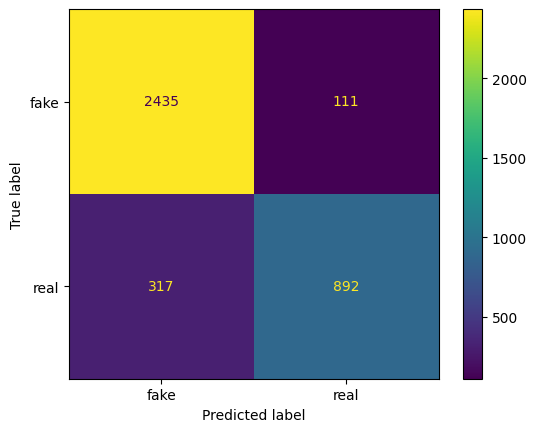

In [78]:
# print metrics and accuracy for MNB
print("MNB accuracy:   %0.3f" % metrics.accuracy_score(testing_targets, multinomailNB_pred))
print("MNB F1 Score is: ", metrics.f1_score(testing_targets, multinomailNB_pred, pos_label="fake"))
print("MNB F1 score (calculated) is: ", calculate_f1Score(multinomailNB_pred))

confusion_matrix_MNB = metrics.confusion_matrix(testing_targets, multinomailNB_pred, labels=multinomailNB_clf.classes_)
cm_display_MNB = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_MNB,  display_labels=multinomailNB_clf.classes_)
cm_display_MNB.plot()
plt.show()

### Print the metrics calculated for the Logistic Regression 

LG accuracy:   0.865
LG F1 Score is:  0.9042392127176381
LG F1 score (calculated) is:  0.9042392127176381


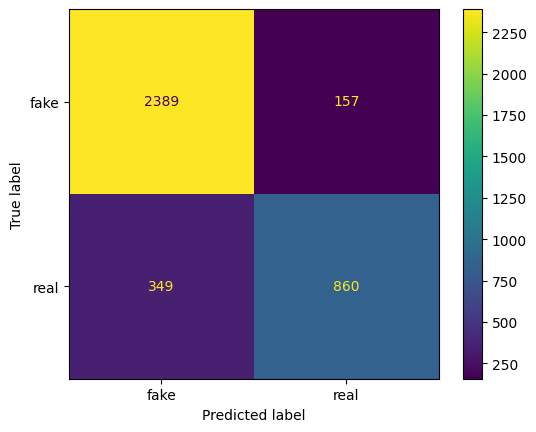

In [79]:
# print metrics and accuracy for LG
print("LG accuracy:   %0.3f" % metrics.accuracy_score(testing_targets, logisticReg_pred))
print("LG F1 Score is: ", metrics.f1_score(testing_targets, logisticReg_pred, pos_label="fake"))
print("LG F1 score (calculated) is: ", calculate_f1Score(logisticReg_pred))

confusion_matrix_LG = metrics.confusion_matrix(testing_targets, logisticReg_pred, labels=logisticReg_clf.classes_)
cm_display_LG = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_LG,  display_labels=logisticReg_clf.classes_)
cm_display_LG.plot()
plt.show()